# 什么是Pytorch？

Pytorch是一个基于Python的科学计算库，它有以下特点：\
（1）类似于Numpy,但它可以使用GPU\
（2）它可以定义深度学习模型，可以灵活地进行深度学习模型的训练和使用

Tensors\
Tensor类似于Numpy的ndarray,唯一的区别是Tensor可以在GPU上加速运算

# 内容一：Pytorch初识

In [10]:
import torch
import torchvision

tensor的构建：
- 构建一个未初始化的5$\times$3矩阵
- 构建一个随机初始化的矩阵
- 构建一个全部为0，类型为long的矩阵
- 从数据直接构建tensor
- 也可以从一个已有的tensor构建一个tensor。这些方法会重用原来tensor的特征，例如数据类型
- 产生跟原来数据相同形状的tensor

In [8]:
import torch
x = torch.empty(5,3)
x = torch.rand(5,3)
x = torch.zeros(5,3,dtype=torch.long) # x = torch.zeros(5,3).long()
x = torch.tensor([5.5,3])
y = x.new_ones(5,3)
print(x)
y = torch.randn_like(x) # x.shape
print(y)

tensor([5.5000, 3.0000])
tensor([-0.6371,  1.0202])


torch.randn_like(x)指的是生成和x数据类型格式相同的随机数值的矩阵

Tensor的运算：
- 加法运算（note: 任何in-place运算都会以_结尾，例如x.copy_(y)）
- 各类的Numpy的index操作都可以在tensor上使用
- Resize操作，使用.view()
- 如果只有一个元素的tensor，使用.item()方法可以把里面的value变成Python数值

In [ ]:
x = torch.rand(4,4)
y = torch.rand(4,4)
# for add
x + y # torch.add(x,y)
print(y)
y.add_(x) # in-place加法#将x加到y上
print(y)
# for index
x[1:,1:]
# for resize
z = x.view(16)
print(z)
z = x.view(2,-1)#将张量调整为不同的大小
print(z)
# pick up the value
single_x = torch.randn(1)
single_x.item()

Numpy与Tensor之间的转化

In [16]:
import numpy as np

# tensor转numpy
a = torch.ones(5)
b = a.numpy()

# numpy转tensor
a = np.ones(5)
b = torch.from_numpy(a)

# 内容二：利用numpy实现两层神经网络

用该程序帮我们复习BP算法\
一个全连接ReLU神经网络，一个隐含层，没有bias，使用L2 Loss
- $h = W_1X+b_1$
- $a = max(0,h)$
- $y_{hat} = W_2a+b_2$

numpy ndarray是一个普通的n维array，它不知道任何关于深度学习或者梯度（gradient）的知识，也不知道计算图（computation graph），只是一种用来计算数学运算的数据结构

0 32244392.845696878
1 30892095.852415226
2 34654620.344644725
3 37348192.34469187
4 33522712.685649637
5 23282877.376938563
6 12655545.513896368
7 6040106.73956954
8 2974784.0882625887
9 1700738.7777781482
10 1148386.5003272318
11 872734.4285587552
12 708145.423342644
13 594123.0163633775
14 507360.95490725304
15 437879.73565758055
16 380708.17602166784
17 332820.29296806396
18 292265.92456548224
19 257696.94219162175
20 228094.04059043084
21 202603.7953247149
22 180525.3393527492
23 161311.08288822504
24 144520.3871100182
25 129809.3199471099
26 116870.88343309757
27 105487.58857459901
28 95417.41467002177
29 86472.63024229009
30 78515.24676135369
31 71411.11616468691
32 65049.356710258624
33 59348.335730278435
34 54224.81698623314
35 49614.34245881529
36 45452.69043239127
37 41697.29580666959
38 38305.31420607933
39 35232.34508975391
40 32444.385988359296
41 29912.40819277011
42 27605.444771732586
43 25501.905436142126
44 23578.06322718942
45 21819.680980993122
46 20206.809427404278

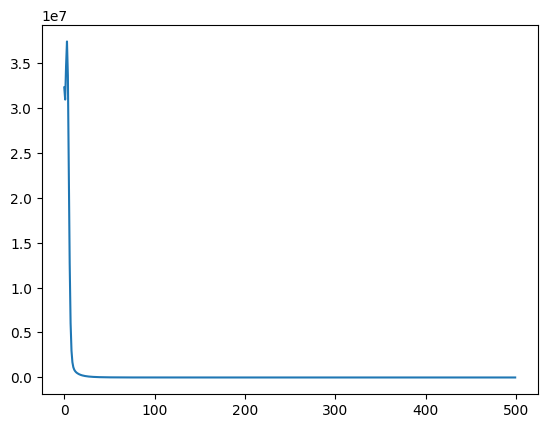

In [13]:
import matplotlib.pyplot as plt
import numpy as np
N,D_in,H,D_out = 64, 1000, 100, 10 # N: batch size, D_in:input size, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = np.random.randn(N,D_in) # random initialize some data
y = np.random.randn(N,D_out) # random initialize the label of the data
w1 = np.random.randn(D_in,H) # 初始化权重
w2 = np.random.randn(H,D_out)
loss_list=[]
learning_rate = 1e-6
for it in range(500):
    # forward pass，compute the output
    h = x.dot(w1) # N * H
    h_relu = np.maximum(h,0) # N * H
    y_pred = h_relu.dot(w2) # N * D_out
    # compute loss
    loss = np.square(y_pred-y).sum()
    print(it,loss)
    loss_list.append(loss)
    # BP - compute the gradient
    grad_y_pred = 2.0 * (y_pred-y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h<0] = 0
    grad_w1 = x.T.dot(grad_h)    
    # update weights of w1 and w2
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2  

plt.plot(loss_list)
plt.show()

In [8]:
y = x.new_ones(5,3)
y.dtype

torch.float32

# 内容三：利用Tensors实现两层神经网络

利用tensors来创建前向神经网络，计算损失以及反向传播

Tensor: 一个Pytorch Tensor很像一个numpy的ndarray，但是它和numpy ndarray最大的区别是，Pytorch Tensor可以再CPU或者GPU上运算。如果想在GPU上运算，就需要把Tensor换成cuda类型

Autograd: Pytorch的一个重要功能就是autograd，也就是说只要定义了forward pass（前向神经网络），计算了Loss之后，Pytorch可以自动求导计算模型所有参数的梯度。

要想计算某个Tensor x 的梯度需要x.requires_grad = True,那么x.grad存储着x当前梯度

# 子内容一：直接用Tensor替换numpy

子内容1主要做的工作为用tensor替换numpy，明显速度加快了，同时，tensor支持自动求导，可以用于深度学习中的神经网络，而numpy则不支持自动求导。这样可以方便地实现反向传播和梯度更新。

0 36137196.0
1 33649604.0
2 35341568.0
3 34537516.0
4 28061734.0
5 18195258.0
6 9844415.0
7 4995974.0
8 2695993.5
9 1663108.375
10 1171294.75
11 904722.625
12 737217.4375
13 618430.4375
14 527241.75
15 454044.90625
16 393807.40625
17 343596.25
18 301242.53125
19 265218.0625
20 234318.09375
21 207741.203125
22 184772.203125
23 164831.0
24 147444.96875
25 132249.671875
26 118949.8515625
27 107247.375
28 96914.1328125
29 87746.78125
30 79607.6484375
31 72347.0390625
32 65855.8671875
33 60038.26953125
34 54821.2890625
35 50130.8671875
36 45903.0625
37 42084.9296875
38 38632.02734375
39 35502.2265625
40 32670.056640625
41 30095.7890625
42 27751.36328125
43 25614.3359375
44 23662.828125
45 21879.0
46 20246.6875
47 18753.35546875
48 17383.099609375
49 16124.8671875
50 14968.5068359375
51 13904.8095703125
52 12924.8974609375
53 12022.080078125
54 11189.955078125
55 10421.73046875
56 9711.76171875
57 9055.5986328125
58 8448.3154296875
59 7885.84228515625
60 7364.3994140625
61 6880.7890625
62 64

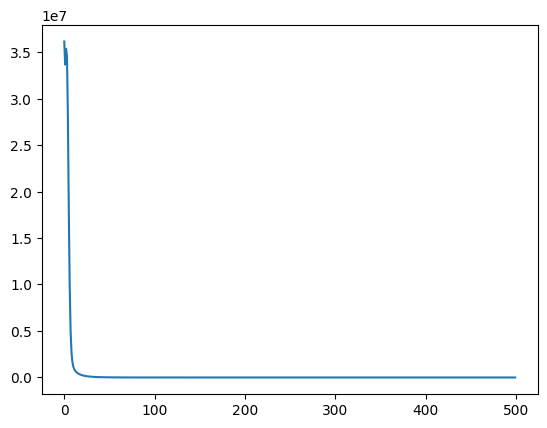

In [47]:
import torch # 导入PyTorch的基本模块
import matplotlib.pyplot as plt # 导入matplotlib.pyplot模块，用于绘制图像

N,D_in,H,D_out = 64, 1000, 100, 10 # 定义一些网络的参数，N是批量大小，D_in是输入维度，H是隐藏层维度，D_out是输出维度
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # 生成一个N*D_in的随机张量作为输入数据，randn表示正态分布
y = torch.randn(N,D_out) # 生成一个N*D_out的随机张量作为目标数据，randn表示正态分布
w1 = torch.randn(D_in,H,requires_grad=True) # 生成一个D_in*H的随机张量作为第一层的权重，requires_grad=True表示需要计算梯度
w2 = torch.randn(H,D_out,requires_grad=True) # 生成一个H*D_out的随机张量作为第二层的权重，requires_grad=True表示需要计算梯度
loss_list=[] # 定义一个空列表，用于存储每个迭代的损失值
learning_rate = 1e-6 # 定义一个学习率，用于控制参数的更新步长
for it in range(500): # 定义一个循环，进行500次迭代
    # forward pass
    h = x.mm(w1) # N * H      h = x.dot(w1) # 使用矩阵乘法计算输入数据和第一层权重的乘积，得到隐藏层的输出
    h_relu = h.clamp(min=0) # N * H     np.maximum(h,0) # 使用clamp函数将隐藏层的输出限制在大于等于0的范围，相当于ReLU激活函数
    y_pred = h_relu.mm(w2) # N * D_out     h_relu.dot(w2) # 使用矩阵乘法计算隐藏层的输出和第二层权重的乘积，得到预测输出
    # compute loss
    loss = (y_pred - y).pow(2).sum() # np.square(y_pred-y).sum() # 使用平方差的和作为损失函数，计算预测输出和目标数据之间的误差
    print(it,loss.item()) #  print(it,loss) # 打印当前的迭代次数和损失值，loss.item()表示将张量转换为标量
    loss_list.append(loss.detach().numpy()) # 将损失值从计算图中分离出来，转换为numpy数组，追加到损失列表中
    # BP - compute the gradient
    loss.backward() # 调用损失的反向传播函数，计算网络参数的梯度
    # update weights of w1 and w2
    with torch.no_grad(): # 使用torch.no_grad()来避免记录梯度信息，因为我们不需要优化器
        w1 -= learning_rate * w1.grad # 手动更新第一层的权重，根据梯度和学习率
        w2 -= learning_rate * w2.grad # 手动更新第二层的权重，根据梯度和学习率
        w1.grad.zero_() # 将第一层的权重的梯度清零，为下一次迭代做准备
        w2.grad.zero_() # 将第二层的权重的梯度清零，为下一次迭代做准备
plt.plot(loss_list) # 使用matplotlib.pyplot模块绘制损失列表
plt.show() # 显示绘制的图像


# 子内容二：用Tensor的autograd直接计算梯度

In [ ]:
Tensor可以自动帮我们计算BP

0 33621572.0
1 29758408.0
2 26632370.0
3 21333688.0
4 14911714.0
5 9230603.0
6 5421385.0
7 3224331.75
8 2047246.875
9 1410268.75
10 1046552.625
11 820646.875
12 667621.125
13 556127.4375
14 470340.6875
15 402303.78125
16 346822.125
17 300778.4375
18 262179.84375
19 229530.78125
20 201728.515625
21 177895.4375
22 157368.453125
23 139641.8125
24 124260.2890625
25 110843.921875
26 99125.6875
27 88845.0625
28 79787.984375
29 71789.078125
30 64706.1796875
31 58418.0703125
32 52828.63671875
33 47844.34375
34 43393.078125
35 39407.6640625
36 35834.65625
37 32627.8515625
38 29741.759765625
39 27140.908203125
40 24792.806640625
41 22669.62109375
42 20747.203125
43 19004.810546875
44 17423.4296875
45 15986.7919921875
46 14681.263671875
47 13493.8544921875
48 12411.7763671875
49 11425.1259765625
50 10523.78515625
51 9699.6279296875
52 8945.359375
53 8254.55859375
54 7621.31689453125
55 7040.38525390625
56 6507.3662109375
57 6017.72216796875
58 5567.54931640625
59 5153.36572265625
60 4772.234375
6

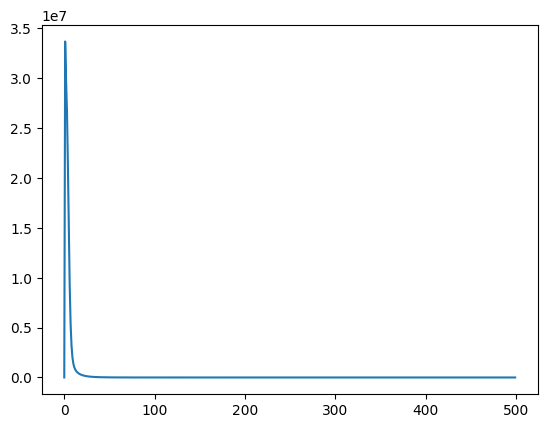

In [46]:
import torch # 导入PyTorch的基本模块
N,D_in,H,D_out = 64, 1000, 100, 10 # 定义一些网络的参数，N是批量大小，D_in是输入维度，H是隐藏层维度，D_out是输出维度
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # 生成一个N*D_in的随机张量作为输入数据，randn表示正态分布
y = torch.randn(N,D_out) # 生成一个N*D_out的随机张量作为目标数据，randn表示正态分布
w1 = torch.randn(D_in,H,requires_grad=True) # 生成一个D_in*H的随机张量作为第一层的权重，requires_grad=True表示需要计算梯度
w2 = torch.randn(H,D_out,requires_grad=True) # 生成一个H*D_out的随机张量作为第二层的权重，requires_grad=True表示需要计算梯度
learning_rate = 1e-6 # 定义一个学习率，用于控制参数的更新步长
loss_list=[] # 定义一个空列表，用于存储每个迭代的损失值
for it in range(500): # 定义一个循环，进行500次迭代
    # forward pass
    h = x.mm(w1) # N * H      h = x.dot(w1) # 使用矩阵乘法计算输入数据和第一层权重的乘积，得到隐藏层的输出
    h_relu = h.clamp(min=0) # N * H     np.maximum(h,0) # 使用clamp函数将隐藏层的输出限制在大于等于0的范围，相当于ReLU激活函数
    y_pred = h_relu.mm(w2) # N * D_out     h_relu.dot(w2) # 使用矩阵乘法计算隐藏层的输出和第二层权重的乘积，得到预测输出
    # compute loss
    loss_list.append(loss.detach().numpy()) # 将损失值从计算图中分离出来，转换为numpy数组，追加到损失列表中
    loss = (y_pred - y).pow(2).sum() # np.square(y_pred-y).sum() # 使用平方差的和作为损失函数，计算预测输出和目标数据之间的误差
    print(it,loss.item()) #  print(it,loss) # 打印当前的迭代次数和损失值，loss.item()表示将张量转换为标量
    # BP - compute the gradient
    loss.backward() # 调用损失的反向传播函数，计算网络参数的梯度
    # update weights of w1 and w2
    with torch.no_grad(): # 使用torch.no_grad()来避免记录梯度信息，因为我们不需要优化器
        w1 -= learning_rate * w1.grad # 手动更新第一层的权重，根据梯度和学习率
        w2 -= learning_rate * w2.grad # 手动更新第二层的权重，根据梯度和学习率
        w1.grad.zero_() # 将第一层的权重的梯度清零，为下一次迭代做准备
        w2.grad.zero_() # 将第二层的权重的梯度清零，为下一次迭代做准备
plt.plot(loss_list) # 使用matplotlib.pyplot模块绘制损失列表
plt.show() # 显示绘制的图像


# 子内容三：利用Pytorch的nn库来构建网络

In [ ]:
利用pytorch的nn库来构建了神经网络模型，最终实现了神经网络

0 665.4111328125
1 617.40869140625
2 576.0825805664062
3 539.771484375
4 507.3753662109375
5 478.1628112792969
6 451.5210266113281
7 426.90789794921875
8 404.1749267578125
9 382.9123840332031
10 362.9151306152344
11 344.0830078125
12 326.339111328125
13 309.6169738769531
14 293.65472412109375
15 278.51763916015625
16 264.0515441894531
17 250.27655029296875
18 237.15191650390625
19 224.56857299804688
20 212.5120849609375
21 201.0006561279297
22 189.9995574951172
23 179.51431274414062
24 169.54476928710938
25 160.037353515625
26 150.97262573242188
27 142.3522186279297
28 134.17898559570312
29 126.40043640136719
30 119.02944946289062
31 112.05415344238281
32 105.453857421875
33 99.22040557861328
34 93.30599975585938
35 87.71497344970703
36 82.44575500488281
37 77.47539520263672
38 72.78372955322266
39 68.36846923828125
40 64.21153259277344
41 60.30896759033203
42 56.643455505371094
43 53.20214080810547
44 49.975013732910156
45 46.94929504394531
46 44.10848617553711
47 41.44451904296875
48

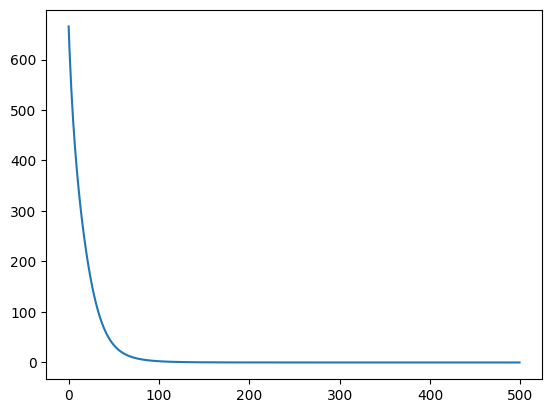

In [45]:
import torch.nn as nn # 导入PyTorch的神经网络模块
import torch # 导入PyTorch的基本模块
import matplotlib.pyplot as plt # 导入matplotlib.pyplot模块，用于绘制图像

N,D_in,H,D_out = 64, 1000, 100, 10 # 定义一些网络的参数，N是批量大小，D_in是输入维度，H是隐藏层维度，D_out是输出维度
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # 生成一个N*D_in的随机张量作为输入数据，randn表示正态分布
y = torch.randn(N,D_out) # 生成一个N*D_out的随机张量作为目标数据，randn表示正态分布

model = nn.Sequential( # 定义一个顺序容器，按照顺序执行里面的模块
    nn.Linear(D_in,H), # 定义一个线性层，将输入维度映射到隐藏层维度
    nn.ReLU(), # 定义一个ReLU激活函数
    nn.Linear(H,D_out) # 定义一个线性层，将隐藏层维度映射到输出维度
)
loss_fn=nn.MSELoss(reduction='sum') # 定义一个均方误差损失函数，reduction='sum'表示对所有元素求和

learning_rate = 1e-4 # 定义一个学习率，用于控制优化器的更新步长
loss_list=[] # 定义一个空列表，用于存储每个迭代的损失值
for it in range(500): # 定义一个循环，进行500次迭代
    # forward pass
    y_pred=model(x) # 调用网络的前向传播函数，传入输入数据，得到预测输出
    # compute loss
    loss = loss_fn(y_pred ,y) # 调用损失函数，传入预测输出和目标数据，得到损失值
    loss_list.append(loss.detach().numpy()) # 将损失值从计算图中分离出来，转换为numpy数组，追加到损失列表中
    print(it,loss.item()) # 打印当前的迭代次数和损失值，loss.item()表示将张量转换为标量
    # BP - compute the gradient
    loss.backward() # 调用损失的反向传播函数，计算网络参数的梯度
    # update weights of w1 and w2
    with torch.no_grad(): # 使用torch.no_grad()来避免记录梯度信息，因为我们不需要优化器
        for param in model.parameters(): # 遍历网络的所有参数
            param-=learning_rate*param.grad # 手动更新参数，根据梯度和学习率
    model.zero_grad() # 将网络参数的梯度清零，为下一次迭代做准备
plt.plot(loss_list) # 使用matplotlib.pyplot模块绘制损失列表
plt.show() # 显示绘制的图像


# 子内容四：利用Pytorch的optim来更新参数

子内容四主要采用torch的包optim来引入优化函数，使得代码更加简便

0 701.7574462890625
1 649.889892578125
2 605.5401611328125
3 566.6929931640625
4 532.17431640625
5 500.8739318847656
6 472.4869689941406
7 446.4113464355469
8 422.486328125
9 400.19873046875
10 379.360107421875
11 359.67279052734375
12 341.042724609375
13 323.3699951171875
14 306.5877990722656
15 290.7048034667969
16 275.6241149902344
17 261.20147705078125
18 247.4492950439453
19 234.32113647460938
20 221.77938842773438
21 209.78036499023438
22 198.34292602539062
23 187.43704223632812
24 177.02490234375
25 167.11712646484375
26 157.72850036621094
27 148.77691650390625
28 140.28343200683594
29 132.2191619873047
30 124.54175567626953
31 117.2498550415039
32 110.33230590820312
33 103.80315399169922
34 97.6617660522461
35 91.85733032226562
36 86.38121032714844
37 81.21773529052734
38 76.35015869140625
39 71.771484375
40 67.46141052246094
41 63.40386962890625
42 59.594486236572266
43 56.01356506347656
44 52.647396087646484
45 49.48482131958008
46 46.516510009765625
47 43.72444534301758
48 4

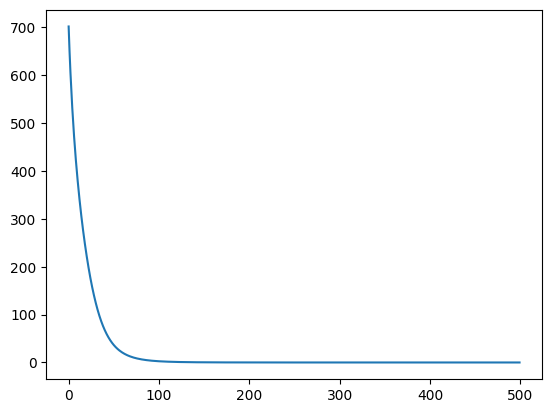

In [43]:
import torch.optim as optim # 导入PyTorch的优化器模块
import torch.nn as nn # 导入PyTorch的神经网络模块
import torch # 导入PyTorch的基本模块
import matplotlib.pyplot as plt # 导入matplotlib.pyplot模块，用于绘制图像

N,D_in,H,D_out = 64, 1000, 100, 10 # 定义一些网络的参数，N是批量大小，D_in是输入维度，H是隐藏层维度，D_out是输出维度
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # 生成一个N*D_in的随机张量作为输入数据，randn表示正态分布
y = torch.randn(N,D_out) # 生成一个N*D_out的随机张量作为目标数据，randn表示正态分布

model = nn.Sequential( # 定义一个顺序容器，按照顺序执行里面的模块
    nn.Linear(D_in,H), # 定义一个线性层，将输入维度映射到隐藏层维度
    nn.ReLU(), # 定义一个ReLU激活函数
    nn.Linear(H,D_out) # 定义一个线性层，将隐藏层维度映射到输出维度
)
loss_fn=nn.MSELoss(reduction='sum') # 定义一个均方误差损失函数，reduction='sum'表示对所有元素求和

learning_rate = 1e-4 # 定义一个学习率，用于控制优化器的更新步长
loss_list=[] # 定义一个空列表，用于存储每个迭代的损失值
optimizer=optim.SGD(model.parameters(),lr=learning_rate) # 定义一个随机梯度下降优化器，传入网络的参数和学习率作为参数
for it in range(500): # 定义一个循环，进行500次迭代
    # forward pass
    y_pred=model(x) # 调用网络的前向传播函数，传入输入数据，得到预测输出
    # compute loss
    loss = loss_fn(y_pred ,y) # 调用损失函数，传入预测输出和目标数据，得到损失值
    print(it,loss.item()) # 打印当前的迭代次数和损失值，loss.item()表示将张量转换为标量
    loss_list.append(loss.detach().numpy()) # 将损失值从计算图中分离出来，转换为numpy数组，追加到损失列表中
    # BP - compute the gradient
    loss.backward() # 调用损失的反向传播函数，计算网络参数的梯度
    # update weights of w1 and w2
    optimizer.step() # 调用优化器的更新函数，根据梯度和学习率更新网络参数
    #with torch.no_grad():
    #    for param in model.parameters():
    #        param-=learning_rate*param.grad
    # 这是另一种更新参数的方法，不使用优化器，而是手动更新，需要用torch.no_grad()来避免记录梯度信息
    model.zero_grad() # 将网络参数的梯度清零，为下一次迭代做准备
plt.plot(loss_list) # 使用matplotlib.pyplot模块绘制损失列表
plt.show() # 显示绘制的图像


# 子内容五：利用类来完成网络构建

子内容5用PyTorch实现一个两层的全连接神经网络，用来拟合一个从1000维的输入到10维的输出的函数。
首先定义一些超参数，包括批量大小，输入维度，隐藏层维度，输出维度，和学习率。
他还定义一个神经网络类，继承自PyTorch的nn.Module类。这个类有两个方法，一个是__init__，用来初始化网络的结构，包括两个线性层和一个ReLU激活函数；另一个是forward，用来定义网络的前向传播过程，即如何从输入x得到输出y_pred。
另外定义一个损失函数，使用均方误差作为评价指标，设置reduction='sum'表示  对所有样本的损失求和。
最终将损失函数的loss进行拟合。

0 652.6966552734375
1 599.3013305664062
2 553.947509765625
3 514.7404174804688
4 480.3515930175781
5 449.69683837890625
6 421.92333984375
7 396.5359191894531
8 373.1389465332031
9 351.4535217285156
10 331.3689270019531
11 312.5750732421875
12 294.884521484375
13 278.2235412597656
14 262.5176696777344
15 247.62342834472656
16 233.54518127441406
17 220.2130584716797
18 207.55580139160156
19 195.56576538085938
20 184.23976135253906
21 173.507568359375
22 163.3435516357422
23 153.71800231933594
24 144.64219665527344
25 136.05914306640625
26 127.94367980957031
27 120.26546478271484
28 112.98704528808594
29 106.10224914550781
30 99.60139465332031
31 93.486572265625
32 87.72160339355469
33 82.30413818359375
34 77.22038269042969
35 72.44084930419922
36 67.94942474365234
37 63.73427200317383
38 59.780941009521484
39 56.071048736572266
40 52.58428192138672
41 49.324493408203125
42 46.26741027832031
43 43.406063079833984
44 40.72343826293945
45 38.21192932128906
46 35.8619499206543
47 33.66040039

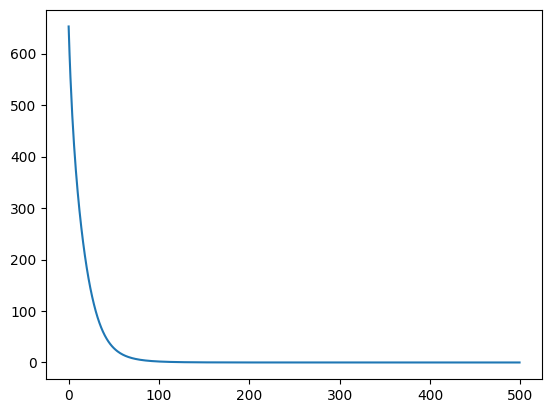

In [41]:
import torch.nn as nn # 导入PyTorch的神经网络模块
import torch # 导入PyTorch的基本模块
import torch.optim as optim # 导入PyTorch的优化器模块

N,D_in,H,D_out = 64, 1000, 100, 10 # 定义一些网络的参数，N是批量大小，D_in是输入维度，H是隐藏层维度，D_out是输出维度
# 随机初始化一些训练数据
x = torch.randn(N,D_in) # 生成一个N*D_in的随机张量作为输入数据，randn表示正态分布
y = torch.randn(N,D_out) # 生成一个N*D_out的随机张量作为目标数据，randn表示正态分布
class TwoLayernet(torch.nn.Module):#定义神经网络类，继承自nn.Module
    def __init__(self,D_in,H,D_out): # 定义网络的初始化函数，接收输入维度，隐藏层维度和输出维度作为参数
        super(TwoLayernet,self).__init__() # 调用父类的初始化函数
        self.linear1=nn.Linear(D_in,H) # 定义第一个线性层，将输入维度映射到隐藏层维度
        self.relu=nn.ReLU() # 定义一个ReLU激活函数
        self.linear2=nn.Linear(H,D_out) # 定义第二个线性层，将隐藏层维度映射到输出维度
    def forward(self,x): # 定义网络的前向传播函数，接收输入数据作为参数
        y_pred=self.linear2(self.relu(self.linear1(x))) # 将输入数据依次通过第一个线性层，ReLU激活函数和第二个线性层，得到预测输出
        return y_pred # 返回预测输出
model1=TwoLayernet(D_in,H,D_out) # 创建一个网络实例，传入输入维度，隐藏层维度和输出维度作为参数

loss_fn=nn.MSELoss(reduction='sum') # 定义一个均方误差损失函数，reduction='sum'表示对所有元素求和
loss_list=[] # 定义一个空列表，用于存储每个迭代的损失值
learning_rate = 1e-4 # 定义一个学习率，用于控制优化器的更新步长

optimizer=optim.SGD(model1.parameters(),lr=learning_rate) # 定义一个随机梯度下降优化器，传入网络的参数和学习率作为参数
for it in range(500): # 定义一个循环，进行500次迭代
    # forward pass
    y_pred=model1(x) # 调用网络的前向传播函数，传入输入数据，得到预测输出
    # compute loss
    loss = loss_fn(y_pred ,y) # 调用损失函数，传入预测输出和目标数据，得到损失值
    print(it,loss.item()) # 打印当前的迭代次数和损失值，loss.item()表示将张量转换为标量
    # BP - compute the gradient
    loss.backward() # 调用损失的反向传播函数，计算网络参数的梯度
    loss_list.append(loss.detach().numpy()) # 将损失值从计算图中分离出来，转换为numpy数组，追加到损失列表中
    # update weights of w1 and w2
    optimizer.step() # 调用优化器的更新函数，根据梯度和学习率更新网络参数
    #with torch.no_grad():
    #    for param in model.parameters():
    #        param-=learning_rate*param.grad
    # 这是另一种更新参数的方法，不使用优化器，而是手动更新，需要用torch.no_grad()来避免记录梯度信息
    model1.zero_grad() # 将网络参数的梯度清零，为下一次迭代做准备
plt.plot(loss_list) # 使用matplotlib.pyplot模块绘制损失列表
plt.show() # 显示绘制的图像


# **拓展实验**

## 拓展实验一

拓展实验一再引入了一个输入，x,z作为神经网络的输入。y=g(x,z)。其中 x 是一个 1000 维的向量， z 是一个 500 维的向量， y 是一个 10 维的向量， g 是一个由神经网络定义的函数。

0 645.325439453125
1 578.7431640625
2 524.0255737304688
3 477.9473876953125
4 437.9075012207031
5 402.6774597167969
6 371.5904235839844
7 343.79949951171875
8 318.57763671875
9 295.567626953125
10 274.52447509765625
11 255.08786010742188
12 236.99749755859375
13 220.1273651123047
14 204.351806640625
15 189.617919921875
16 175.88209533691406
17 163.06900024414062
18 151.09640502929688
19 139.96780395507812
20 129.60784912109375
21 119.96053314208984
22 110.99946594238281
23 102.69729614257812
24 95.00120544433594
25 87.85728454589844
26 81.24337768554688
27 75.12310791015625
28 69.4677505493164
29 64.24644470214844
30 59.42686080932617
31 54.97984313964844
32 50.8455924987793
33 47.03794860839844
34 43.537696838378906
35 40.307769775390625
36 37.33087921142578
37 34.58698654174805
38 32.053138732910156
39 29.71175765991211
40 27.555660247802734
41 25.56540298461914
42 23.732492446899414
43 22.04446029663086
44 20.48768424987793
45 19.051708221435547
46 17.726655960083008
47 16.505197525

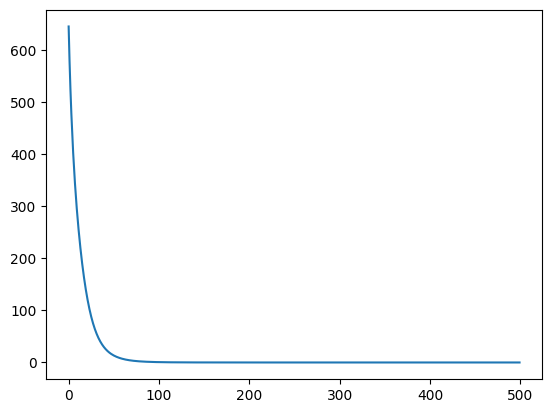

In [36]:
import torch.nn as nn
import torch
import torch.optim as optim

N,D_in1,D_in2,H,D_out = 64, 1000, 500, 100, 10 # N: batch size, D_in1:input size of x, D_in2: input size of z, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in1) # x = np.random.randn(N,D_in1)
z = torch.randn(N,D_in2) # z = np.random.randn(N,D_in2)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
class ThreeLayernet(torch.nn.Module):
    def __init__(self,D_in1,D_in2,H,D_out):
        super(ThreeLayernet,self).__init__()
        self.linear1=nn.Linear(D_in1+D_in2,H) # concatenate x and z as input
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(H,D_out)
    def forward(self,x,z):
        xz = torch.cat((x,z),dim=1) # concatenate x and z along the second dimension
        y_pred=self.linear2(self.relu(self.linear1(xz)))
        return y_pred
model2=ThreeLayernet(D_in1,D_in2,H,D_out)

loss_fn=nn.MSELoss(reduction='sum')
loss_list=[]
learning_rate = 1e-4

optimizer=optim.SGD(model2.parameters(),lr=learning_rate)
for it in range(500):
    # forward pass
    y_pred=model2(x,z)
    # compute loss
    loss = loss_fn(y_pred ,y) # np.square(y_pred-y).sum()
    print(it,loss.item()) #  print(it,loss)
    # BP - compute the gradient
    loss.backward()
    loss_list.append(loss.detach().numpy())
    # update weights of w1 and w2
    optimizer.step()
    model2.zero_grad()
plt.plot(loss_list)
plt.show()


## 拓展实验二

在拓展实验一的基础上，设计更深的神经网络训练模型，使用了四层全连接层和ELU激活函数。

0 799.54736328125
1 415.61602783203125
2 294.7801513671875
3 225.6500244140625
4 180.481201171875
5 148.13812255859375
6 123.62867736816406
7 104.42511749267578
8 89.14932250976562
9 76.76094818115234
10 66.5595474243164
11 58.061912536621094
12 50.91659927368164
13 44.84877395629883
14 39.6517333984375
15 35.174041748046875
16 31.29083251953125
17 27.910493850708008
18 24.957172393798828
19 22.366405487060547
20 20.08780288696289
21 18.076833724975586
22 16.296659469604492
23 14.716257095336914
24 13.309842109680176
25 12.056234359741211
26 10.936971664428711
27 9.93559455871582
28 9.037796974182129
29 8.231304168701172
30 7.505664825439453
31 6.851741790771484
32 6.261477470397949
33 5.727877616882324
34 5.244783401489258
35 4.806819438934326
36 4.40924072265625
37 4.047856330871582
38 3.718977212905884
39 3.4193711280822754
40 3.1461119651794434
41 2.8966121673583984
42 2.6685714721679688
43 2.459977149963379
44 2.2689783573150635
45 2.093923807144165
46 1.9333386421203613
47 1.7858

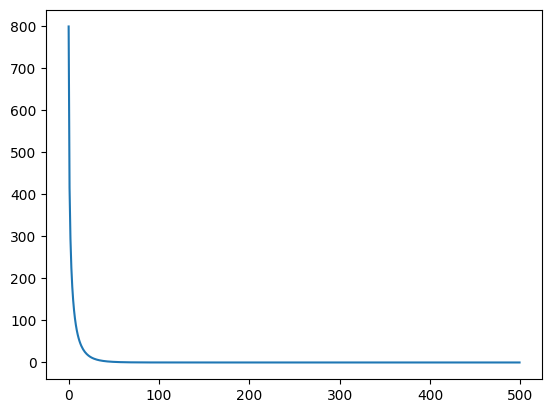

In [35]:
import torch.nn as nn
import torch
import torch.optim as optim

N,D_in1,D_in2,H1,H2,H3,D_out = 64, 1000, 500, 200, 100, 50, 10 # N: batch size, D_in1:input size of x, D_in2: input size of z, H1,H2,H3:hidden sizes, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in1) # x = np.random.randn(N,D_in1)
z = torch.randn(N,D_in2) # z = np.random.randn(N,D_in2)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)
class FourLayernet(torch.nn.Module):
    def __init__(self,D_in1,D_in2,H1,H2,H3,D_out):
        super(FourLayernet,self).__init__()
        self.linear1=nn.Linear(D_in1+D_in2,H1) # concatenate x and z as input
        self.bn1 = nn.BatchNorm1d(H1) # batch normalization for the first hidden layer
        self.elu1=nn.ELU() # ELU activation function for the first hidden layer
        self.linear2=nn.Linear(H1,H2) # second hidden layer
        self.bn2 = nn.BatchNorm1d(H2) # batch normalization for the second hidden layer
        self.elu2=nn.ELU() # ELU activation function for the second hidden layer
        self.linear3=nn.Linear(H2,H3) # third hidden layer
        self.bn3 = nn.BatchNorm1d(H3) # batch normalization for the third hidden layer
        self.elu3=nn.ELU() # ELU activation function for the third hidden layer
        self.linear4=nn.Linear(H3,D_out) # output layer
    def forward(self,x,z):
        xz = torch.cat((x,z),dim=1) # concatenate x and z along the second dimension
        h1=self.elu1(self.bn1(self.linear1(xz))) # first hidden layer with batch normalization and ELU activation
        h2=self.elu2(self.bn2(self.linear2(h1))) # second hidden layer with batch normalization and ELU activation
        h3=self.elu3(self.bn3(self.linear3(h2))) # third hidden layer with batch normalization and ELU activation
        y_pred=self.linear4(h3) # output layer
        return y_pred
model2=FourLayernet(D_in1,D_in2,H1,H2,H3,D_out)

loss_fn=nn.MSELoss(reduction='sum')
loss_list=[]
learning_rate = 1e-4

optimizer=optim.SGD(model2.parameters(),lr=learning_rate)
for it in range(500):
    # forward pass
    y_pred=model2(x,z)
    # compute loss
    loss = loss_fn(y_pred ,y) # np.square(y_pred-y).sum()
    print(it,loss.item()) #  print(it,loss)
    # BP - compute the gradient
    loss.backward()
    loss_list.append(loss.detach().numpy())
    # update weights of w1 and w2
    optimizer.step()
    model2.zero_grad()
plt.plot(loss_list)
plt.show()


## 拓展实验三

在拓展实验一的基础上，采用了四种不同的激活函数，并且对其Loss进行了图像对比。ReLU,Tanh,Sigmoid和ELU。四种激活函数都能使Loss达到收敛，ELU速度最快。ReLU速度最慢

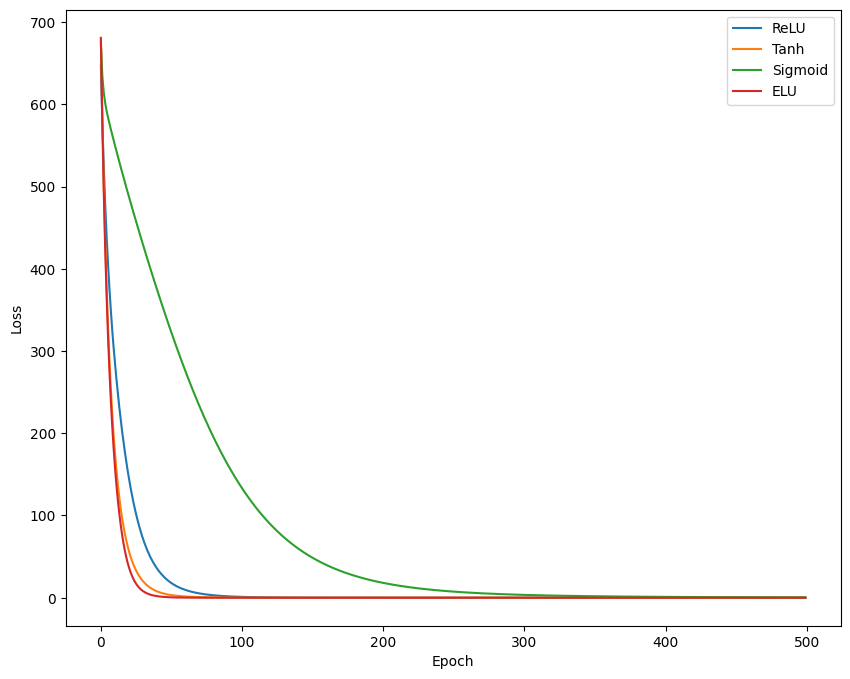

In [38]:
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

N,D_in1,D_in2,H,D_out = 64, 1000, 500, 100, 10 # N: batch size, D_in1:input size of x, D_in2: input size of z, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in1) # x = np.random.randn(N,D_in1)
z = torch.randn(N,D_in2) # z = np.random.randn(N,D_in2)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)

# 定义四种不同的激活函数
activations = [nn.ReLU(), nn.Tanh(), nn.Sigmoid(), nn.ELU()]
# 定义四种不同的模型，每个模型使用一种激活函数
models = [nn.Sequential(nn.Linear(D_in1+D_in2,H), act, nn.Linear(H,D_out)) for act in activations]
# 定义损失函数
loss_fn=nn.MSELoss(reduction='sum')
# 定义学习率
learning_rate = 1e-4
# 定义优化器，每个模型使用一个优化器
optimizers = [optim.SGD(model.parameters(),lr=learning_rate) for model in models]
# 定义迭代次数
epochs = 500
# 定义损失列表，每个模型记录一个损失列表
loss_lists = [[] for _ in range(len(models))]
# 定义激活函数的名称，用于绘图
act_names = ["ReLU", "Tanh", "Sigmoid", "ELU"]

# 对每个模型进行训练
for i, model in enumerate(models):
    # 对每个迭代次数进行训练
    for it in range(epochs):
        # 前向传播
        y_pred=model(torch.cat((x,z),dim=1))
        # 计算损失
        loss = loss_fn(y_pred ,y) # np.square(y_pred-y).sum()
        # 打印损失
        #print(f"Model {i+1}, Epoch {it+1}, Loss {loss.item()}")
        # 反向传播
        loss.backward()
        # 记录损失
        loss_lists[i].append(loss.detach().numpy())
        # 更新权重
        optimizers[i].step()
        # 清零梯度
        model.zero_grad()

# 绘制损失曲线
plt.figure(figsize=(10,8))
for i, loss_list in enumerate(loss_lists):
    plt.plot(loss_list, label=act_names[i])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()


## 拓展实验四

在拓展实验一的基础上，采用了三种不同的优化函数，并且对其Loss进行了图像对比。SGD、Adagrad和Adam三种优化器。由图可知SGD效果最好收敛的最早，而Adagrad在500代的时候还没收敛，效果差于另外二者。

Optimizer 1, Epoch 1, Loss 763.7814331054688
Optimizer 1, Epoch 2, Loss 683.33935546875
Optimizer 1, Epoch 3, Loss 620.26220703125
Optimizer 1, Epoch 4, Loss 568.27197265625
Optimizer 1, Epoch 5, Loss 523.5524291992188
Optimizer 1, Epoch 6, Loss 484.4076232910156
Optimizer 1, Epoch 7, Loss 450.04443359375
Optimizer 1, Epoch 8, Loss 418.873779296875
Optimizer 1, Epoch 9, Loss 390.3836364746094
Optimizer 1, Epoch 10, Loss 364.142822265625
Optimizer 1, Epoch 11, Loss 340.0649719238281
Optimizer 1, Epoch 12, Loss 317.6748962402344
Optimizer 1, Epoch 13, Loss 296.5849914550781
Optimizer 1, Epoch 14, Loss 276.7240295410156
Optimizer 1, Epoch 15, Loss 257.96160888671875
Optimizer 1, Epoch 16, Loss 240.27674865722656
Optimizer 1, Epoch 17, Loss 223.64500427246094
Optimizer 1, Epoch 18, Loss 207.99684143066406
Optimizer 1, Epoch 19, Loss 193.31776428222656
Optimizer 1, Epoch 20, Loss 179.58822631835938
Optimizer 1, Epoch 21, Loss 166.73455810546875
Optimizer 1, Epoch 22, Loss 154.58401489257812

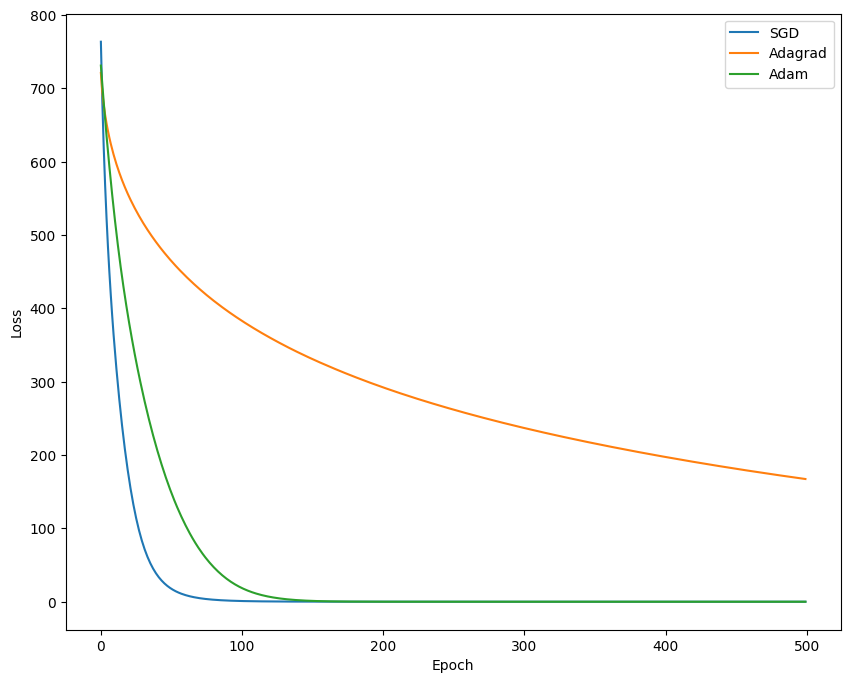

In [16]:
import torch.nn as nn
import torch
import torch.optim as optim
import matplotlib.pyplot as plt

N,D_in1,D_in2,H,D_out = 64, 1000, 500, 100, 10 # N: batch size, D_in1:input size of x, D_in2: input size of z, H:hidden size, D_out: output size
# 随机初始化一些训练数据
x = torch.randn(N,D_in1) # x = np.random.randn(N,D_in1)
z = torch.randn(N,D_in2) # z = np.random.randn(N,D_in2)
y = torch.randn(N,D_out) # y = np.random.randn(N,D_out)

# 定义三层全连接网络
class ThreeLayernet(torch.nn.Module):
    def __init__(self,D_in1,D_in2,H,D_out):
        super(ThreeLayernet,self).__init__()
        self.linear1=nn.Linear(D_in1+D_in2,H) # concatenate x and z as input
        self.relu=nn.ReLU()
        self.linear2=nn.Linear(H,D_out)
    def forward(self,x,z):
        xz = torch.cat((x,z),dim=1) # concatenate x and z along the second dimension
        y_pred=self.linear2(self.relu(self.linear1(xz)))
        return y_pred

# 定义损失函数
loss_fn=nn.MSELoss(reduction='sum')
# 定义学习率
learning_rate = 1e-4
# 定义迭代次数
epochs = 500
# 定义三种不同的优化函数
optimizers = [optim.SGD, optim.Adagrad, optim.Adam]
# 定义优化函数的名称，用于绘图
opt_names = ["SGD", "Adagrad", "Adam"]
# 定义损失列表，每种优化函数记录一个损失列表
loss_lists = [[] for _ in range(len(optimizers))]

# 对每种优化函数进行训练
for i, opt in enumerate(optimizers):
    # 创建一个新的模型实例
    model = ThreeLayernet(D_in1,D_in2,H,D_out)
    # 创建一个新的优化器实例
    optimizer = opt(model.parameters(),lr=learning_rate)
    # 对每个迭代次数进行训练
    for it in range(epochs):
        # 前向传播
        y_pred=model(x,z)
        # 计算损失
        loss = loss_fn(y_pred ,y) # np.square(y_pred-y).sum()
        # 打印损失
        print(f"Optimizer {i+1}, Epoch {it+1}, Loss {loss.item()}")
        # 反向传播
        loss.backward()
        # 记录损失
        loss_lists[i].append(loss.detach().numpy())
        # 更新权重
        optimizer.step()
        # 清零梯度
        model.zero_grad()

# 绘制损失曲线
plt.figure(figsize=(10,8))
for i, loss_list in enumerate(loss_lists):
    plt.plot(loss_list, label=opt_names[i])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
